In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing, model_selection
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
import pylab

In [ ]:
SHEET_ID = '12S6PqUrnkXpdl4-FDWQD-OlkvYkny2RNPyLvbKlVlj0'
SHEET_NAME = '1500858365'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
dataset = pd.read_csv(url)
print(dataset.head())

   Temperature_K  Luminosity  Radius(R/Ro)  Absolute_magnitude  Star_type  \
0           3068        24.0           NaN               16.12          0   
1           3042         5.0         1.542               16.60          0   
2           2600         3.0       102.000               18.70          0   
3           2800         2.0           NaN               16.65          0   
4           1939       138.0       103.000               20.06          0   

  Star_color Spectral_Class  
0        Red              M  
1        Red              M  
2        Red              M  
3        Red              M  
4        Red              M  


In [ ]:
print(dataset)

     Temperature_K  Luminosity  Radius(R/Ro)  Absolute_magnitude  Star_type  \
0             3068        24.0           NaN               16.12          0   
1             3042         5.0         1.542               16.60          0   
2             2600         3.0       102.000               18.70          0   
3             2800         2.0           NaN               16.65          0   
4             1939       138.0       103.000               20.06          0   
..             ...         ...           ...                 ...        ...   
235          38940    374830.0      1356.000               -9.93          5   
236          30839    834042.0      1194.000              -10.63          5   
237           8829    537493.0      1423.000              -10.73          5   
238           9235    404940.0      1112.000              -11.23          5   
239          37882    294903.0      1783.000               -7.80          5   

    Star_color Spectral_Class  
0          Red     

In [ ]:
dataset.isna().sum()

Temperature_K          0
Luminosity             7
Radius(R/Ro)          51
Absolute_magnitude     0
Star_type              0
Star_color             0
Spectral_Class         0
dtype: int64

#Plots informativos

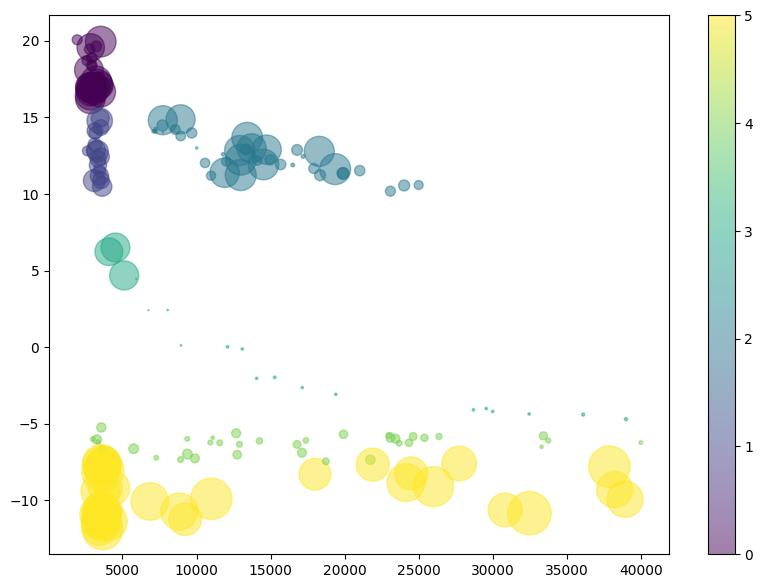

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(dataset['Temperature_K'], dataset['Absolute_magnitude'], c=dataset['Star_type'], cmap='viridis', 
            alpha=0.5, s=dataset['Radius(R/Ro)']/2, label='Luminosity')
plt.colorbar()
plt.show()

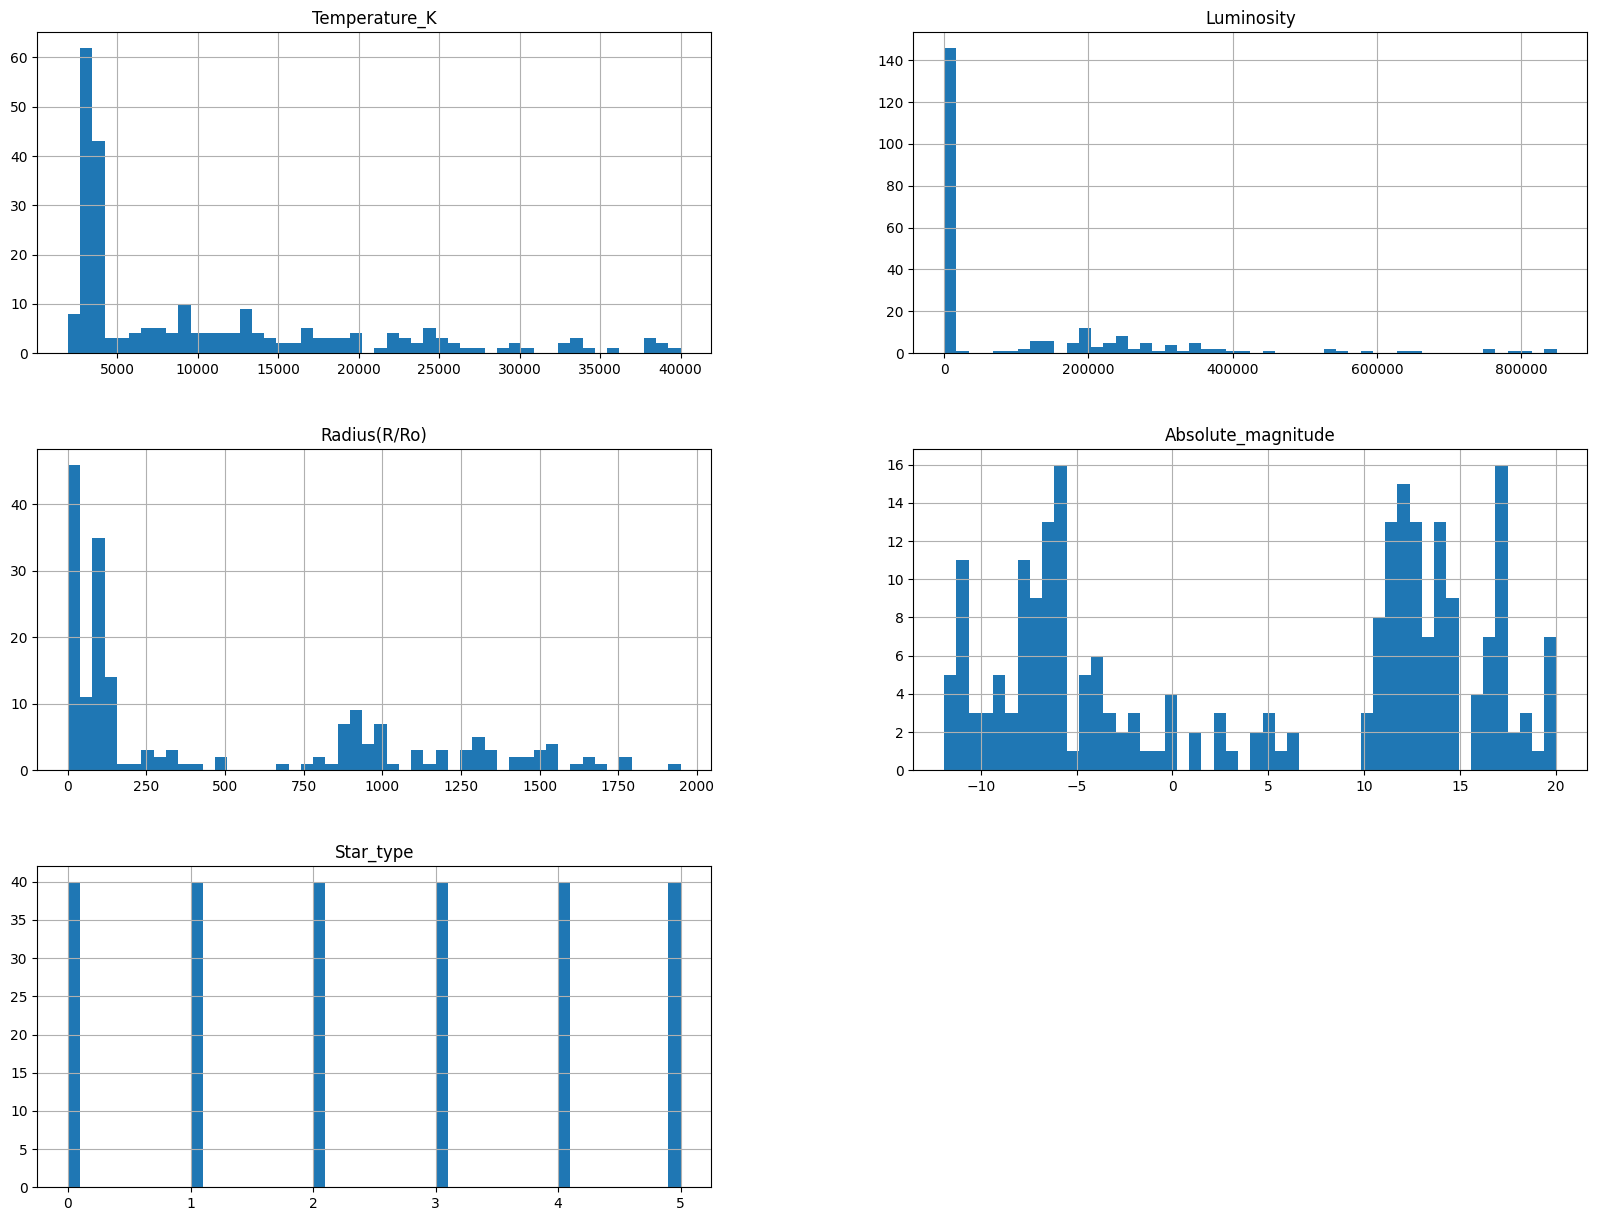

In [ ]:
dataset.hist(bins=50, figsize=(20,15));


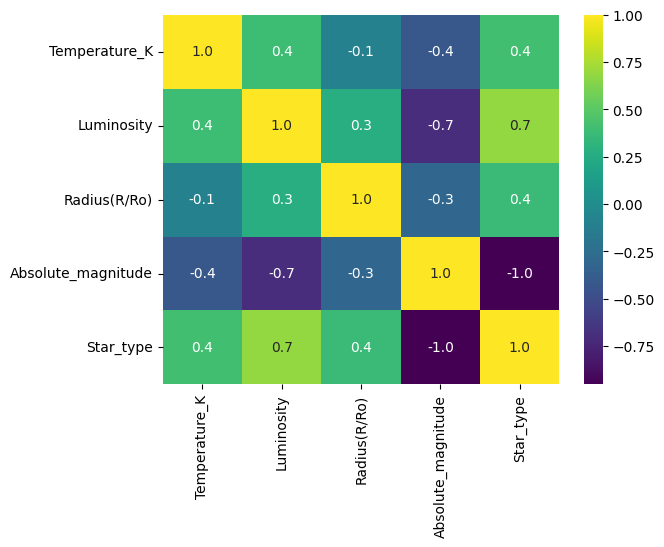

In [ ]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='viridis', fmt='.1f');

In [ ]:
#Tipos de estrellas (variable categórica a numérica)
cafenana= len(dataset.loc[dataset['Star_type']==0])
rojanana= len(dataset.loc[dataset['Star_type']==1])
blancanana= len(dataset.loc[dataset['Star_type']==2])
secuprin= len(dataset.loc[dataset['Star_type']==3])
supergi= len(dataset.loc[dataset['Star_type']==4])
hypergi=len(dataset.loc[dataset['Star_type']==5])
print("Enanas cafe = {}".format(cafenana))
print("Enanas rojas = {}".format(rojanana))
print("Enanas blanca = {}".format(blancanana))
print("Secuencia principal = {}".format(secuprin))
print("Super Gigantes = {}".format(supergi))
print("Hyper Gigantes= {}".format(hypergi))
print("Total de estrellas= {}".format(len(dataset)))

Enanas cafe = 40
Enanas rojas = 40
Enanas blanca = 40
Secuencia principal = 40
Super Gigantes = 40
Hyper Gigantes= 40
Total de estrellas= 240


#División en entrenamiento y prueba

In [ ]:
# Primero dividimos en variables dependientes e independientes
X = dataset.drop(['Star_type','Star_color','Spectral_Class'], axis=1)
Y = dataset['Star_type']

In [ ]:
#Utilizaremos 80% para train y 20% para test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [ ]:
len(X_train)

192

In [ ]:
X_train['Star_type'] = X_train['Star_type'].astype('category')
X_test['Star_type'] = X_test['Star_type'].astype('category')

X_train.dtypes


KeyError: ignored

In [ ]:
X_train

,Temperature_K,Luminosity,Radius(R/Ro),Absolute_magnitude
139,3541,13.0,256.000000,14.330
60,3341,56.0,57.000000,16.230
204,18340,134.0,124.000000,11.220
186,2968,461.0,119.000000,17.450
207,23092,132.0,104.000000,10.180
...,...,...,...,...
106,24630,363000.0,63.000000,-5.830
14,2650,6.0,469.092147,11.782
92,4077,85.0,795.000000,6.228
179,24490,248490.0,1134.500000,-8.240


In [ ]:
X_train.dtypes

Temperature_K           int64
Luminosity            float64
Radius(R/Ro)          float64
Absolute_magnitude    float64
dtype: object

In [ ]:
corr = dataset.corr()
corr['Star_type'].sort_values(ascending=False)

<ipython-input-17-1e0a257a3ed5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


Star_type             1.000000
Luminosity            0.686509
Temperature_K         0.411129
Radius(R/Ro)          0.370238
Absolute_magnitude   -0.952790
Name: Star_type, dtype: float64

In [ ]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, 
                                                ['Luminosity', 'Temperature_K',
                                                 'Radius(R/Ro)', 'Absolute_magnitude'
                                                 ])])

In [ ]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3
0,-0.603773,-0.723954,-0.444105,0.915176
1,-0.603516,-0.745382,-0.858842,1.097818
2,-0.603050,0.861604,-0.719207,0.616220
3,-0.601093,-0.785345,-0.729627,1.215093
4,-0.603062,1.370731,-0.760889,0.516248
...,...,...,...,...
187,1.567790,1.535511,-0.846337,-1.022749
188,-0.603815,-0.819415,0.000000,0.670244
189,-0.603343,-0.666527,0.679225,0.136353
190,0.882736,1.520512,1.386777,-1.254416


In [ ]:
# Guardemos los resultados en variables
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
# Transformemos tambien Y
Y_train_proc = numeric_transformer.fit_transform(Y_train.values.reshape(-1,1))#Y_train.values.reshape(-1,1)
Y_test_proc = numeric_transformer.fit_transform(Y_test.values.reshape(-1,1))#Y_test.values.reshape(-1,1)

In [ ]:
lin = LinearRegression()

In [ ]:
lin = lin.fit(X_train_proc, Y_train_proc.ravel())

In [ ]:
print('R^2 en train {}'.format(lin.score(X_train_proc, Y_train_proc)))
print('R^2 en test {}'.format(lin.score(X_test_proc, Y_test_proc)))

R^2 en train 0.9061929088561029
R^2 en test 0.9061087779587516


In [ ]:
print('La pendiente es {}'.format(lin.intercept_))
print('Las ordenadas son {}'.format(lin.coef_))

La pendiente es 8.980477603123019e-17
Las ordenadas son [ 0.01233129  0.03600676  0.07656998 -0.90601147]


In [ ]:
train_pred = lin.predict(X_train_proc)
train_pred


array([-0.89667757, -1.09467781, -0.58978502, -1.19244564, -0.48406867,
       -0.74992948,  0.94273497, -0.48121521,  1.49315851,  0.49632343,
       -0.65602446, -0.61183547,  0.61546193, -1.0132197 , -1.0393036 ,
       -0.97957555,  1.05594865, -1.18815944,  0.95378765, -0.69446986,
        1.34877477, -0.72121494,  1.49792574,  1.44088121, -0.89945144,
       -1.16323548, -0.64023852, -0.85367649, -1.09616768,  1.642859  ,
        0.99375563,  0.92963261,  0.19642287, -1.16126684,  0.35880217,
       -0.63260006, -0.59659152,  0.78149606, -0.81027964,  0.11742959,
       -0.7524111 ,  0.85886245,  0.96021836, -0.82309026,  0.90961876,
        1.19777178, -0.85635621, -0.66512975, -0.78941189,  0.87854951,
        0.88178876, -0.61993345, -0.79306035, -0.60749771, -0.89132308,
        1.48994507,  0.81560479,  1.51784205, -0.58916212, -1.02039169,
       -1.30547742, -0.67505929,  0.91737551,  1.01102634,  1.46935117,
       -0.50505407,  1.48093075, -0.07854465, -0.86598764,  0.92

In [ ]:
mse_train = mean_squared_error(Y_train_proc, train_pred)
rmse_train = np.sqrt(mse_train)
rmse_train

0.3062794331062684

In [ ]:
test_pred = lin.predict(X_test_proc)
mse = mean_squared_error(Y_test_proc, test_pred)
rmse = np.sqrt(mse)
rmse

0.3064167456932608

#SGD



In [ ]:
#instancia modelo
lin = SGDRegressor(penalty=None, learning_rate='constant', eta0=3e-4, max_iter=5000,
                   n_iter_no_change=5001).fit(
    X_train_proc, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
lin.score(X_train_proc, Y_train)

0.9061929001672254

In [ ]:
print('La pendiente es {}'.format(lin.intercept_))
print('Las ordenadas son {}'.format(lin.coef_))

La pendiente es [2.44794049]
Las ordenadas son [ 0.02071928  0.06045316  0.12888386 -1.52431   ]


In [ ]:
def train_SGD(X_train, Y_train, X_test, Y_test, eta0=1e-3, iter=100000):
    model = SGDRegressor(penalty=None, learning_rate='constant', eta0=eta0, max_iter=100000,
                         n_iter_no_change=iter+1)
    loss_train = []
    loss_test = []
    for i in range(iter):
        model.partial_fit(X_train, Y_train)
        loss_train.append(np.sqrt(mean_squared_error(Y_train, model.predict(X_train))))
        loss_test.append(np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))
    del model
    return loss_train, loss_test

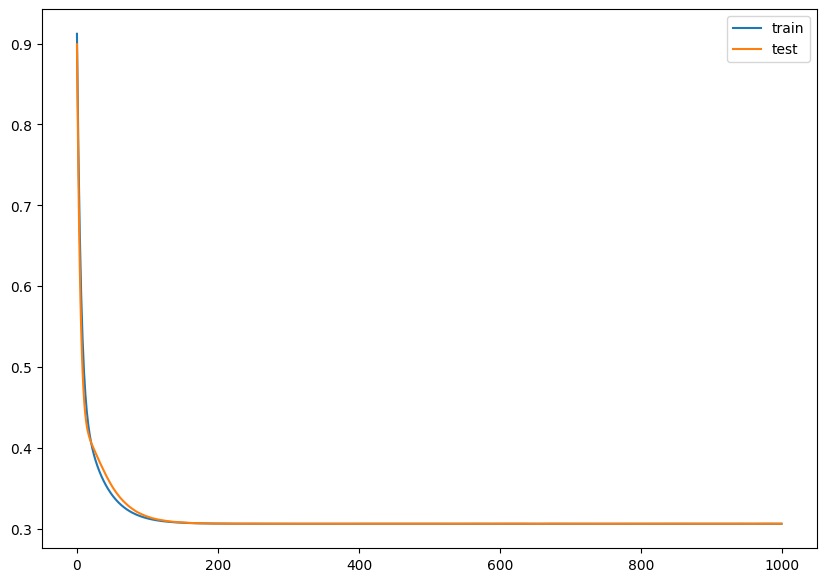

In [ ]:
plt.figure(figsize=(10,7))
a,b = train_SGD(X_train_proc, Y_train_proc.ravel(), X_test_proc, Y_test_proc.ravel(), 
                eta0=3e-4, iter=1000)
plt.plot(a, label='train')
plt.plot(b, label='test')
plt.legend();

#Graficas de supuestos

In [ ]:
residuales_train = (Y_train_proc.ravel() - train_pred.ravel())
res_t = {'residuales': residuales_train, 'predicted_val':train_pred, 'tipo': 'train'}
residuales_train = pd.DataFrame(res_t)
residuales_test = (Y_test_proc.ravel() - test_pred.ravel())
res_tr = {'residuales': residuales_test, 'predicted_val':test_pred, 'tipo': 'test'}
residuales_test = pd.DataFrame(res_tr)

residuales = pd.concat([residuales_test,residuales_train])

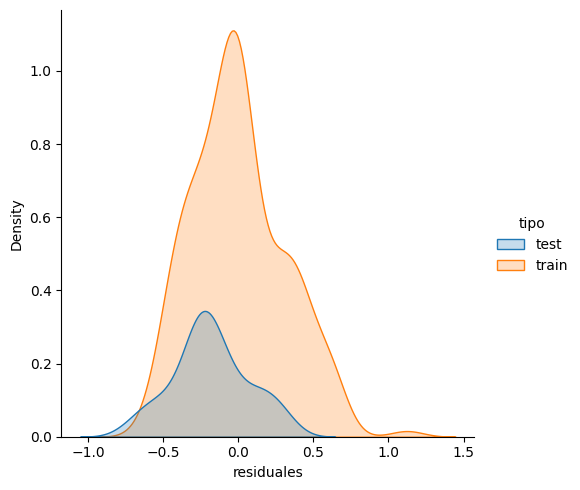

In [ ]:
sns.displot(data=residuales, x='residuales', hue='tipo', kind='kde', fill=True);

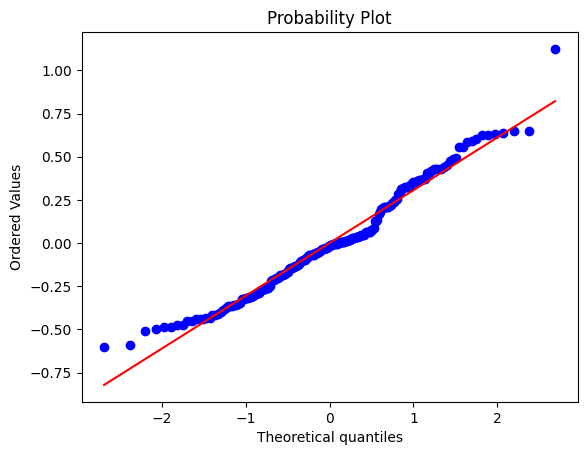

In [ ]:
# para entrenamiento
stats.probplot(residuales_train['residuales'], plot=pylab);

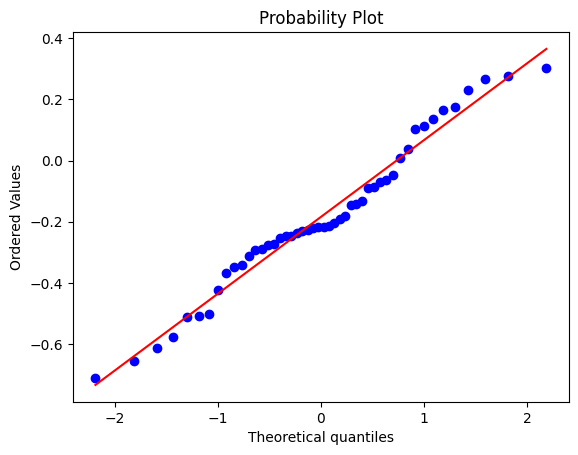

In [ ]:
# para test
stats.probplot(residuales_test['residuales'], plot=pylab);

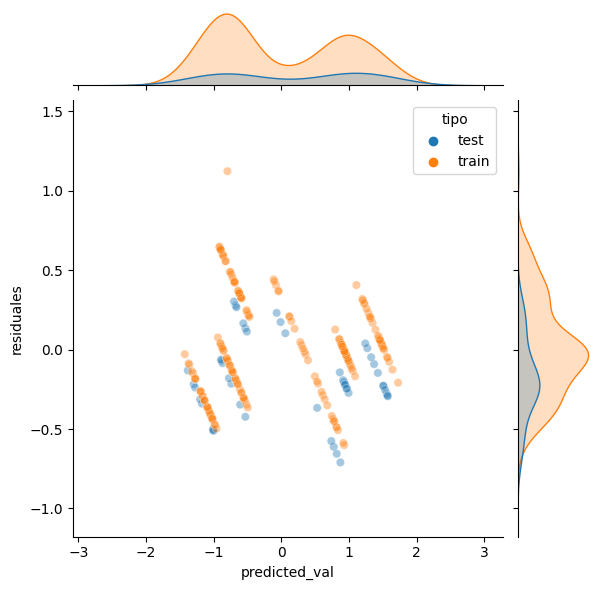

In [ ]:
sns.jointplot(data=residuales, x='predicted_val', y='residuales', hue='tipo',
              alpha=0.4)

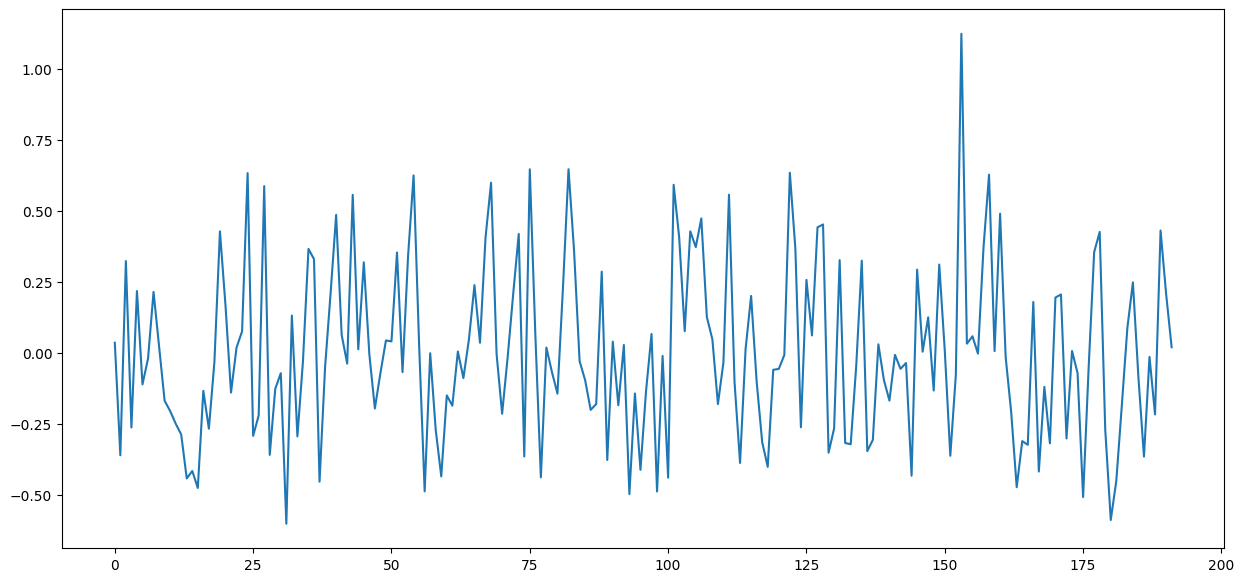

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(residuales_train['residuales'])